In [63]:
import pandas as pd

In [64]:
data = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv", encoding='cp1252')
cond = (data['CCAA']=='AN') & (data['CASOS'].notnull()) & (data['Hospitalizados'].notnull()) & (data['UCI'].notnull()) & (data['Recuperados'].notnull()) & (data['Fallecidos'].notnull())
andalucia = data[cond]
andalucia['Activos'] = andalucia['CASOS'] - andalucia['Fallecidos'] - andalucia['Recuperados']

# Cambiar índice por la fecha
andalucia = andalucia.set_index('FECHA')

# Información del dataframe para ANDALUCÍA
print(andalucia)

          CCAA    CASOS  Hospitalizados    UCI  Fallecidos  Recuperados  \
FECHA                                                                     
10/3/2020   AN     90.0            32.0    3.0         0.0         11.0   
11/3/2020   AN    115.0            50.0    4.0         0.0         11.0   
12/3/2020   AN    219.0            92.0    8.0         0.0          0.0   
13/3/2020   AN    269.0            92.0    8.0         2.0          0.0   
14/3/2020   AN    437.0            92.0    8.0         6.0          0.0   
15/3/2020   AN    554.0           197.0   11.0         7.0          0.0   
16/3/2020   AN    683.0           229.0   13.0        11.0          0.0   
17/3/2020   AN    859.0           319.0   21.0        19.0         38.0   
18/3/2020   AN   1008.0           384.0   25.0        23.0         33.0   
19/3/2020   AN   1287.0           501.0   38.0        30.0         36.0   
20/3/2020   AN   1515.0           605.0   53.0        40.0         36.0   
21/3/2020   AN   1725.0  

/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


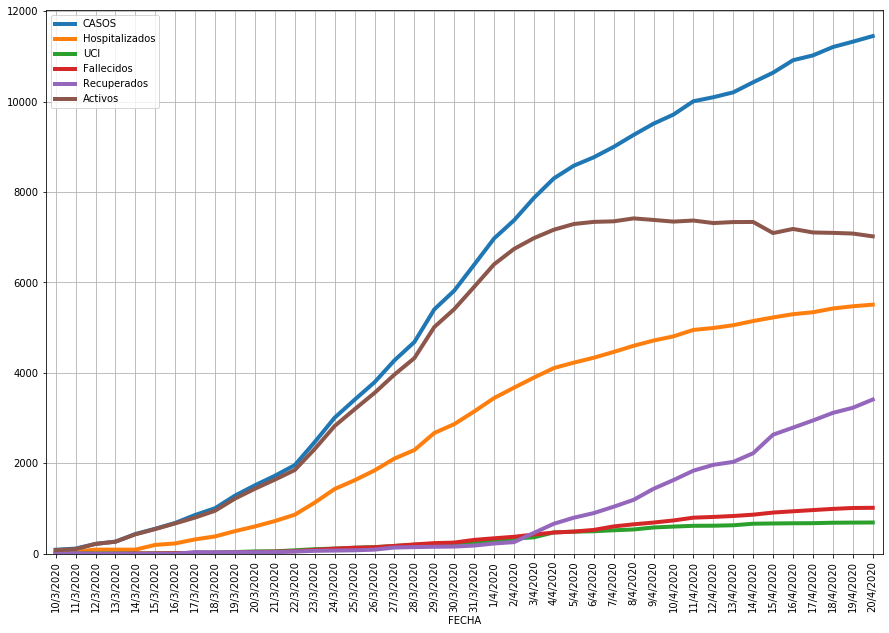

<Figure size 432x288 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax1 = andalucia.plot(kind='line', lw=4, grid=True, figsize=(15,10), ax=ax)
ax2 = andalucia.plot(kind='bar', alpha=0, lw=4, grid=True, figsize=(15,10), ax=ax, legend=None)

plt.show()
plt.clf()

In [66]:
# Define new daily cases ('New')
daily_list = []
for i, active in enumerate(andalucia['CASOS']):
    if i==0:
        daily_list.append(active)
    else:
        daily_list.append(active-prev_active)
    prev_active = active
    
andalucia['NUEVOS'] = daily_list

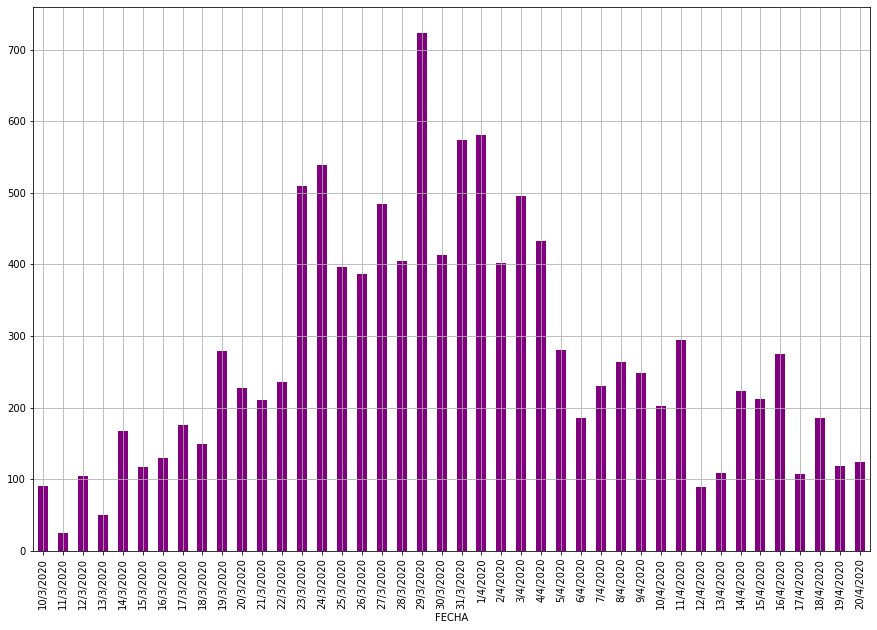

In [67]:
ax = plt.gca()
ax3 = andalucia['NUEVOS'].plot(kind='bar', alpha=1, color='purple', grid=True, figsize=(15,10), ax=ax, legend=None)

plt.show()